In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
churn_data=pd.read_csv('customer_churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#change churn from object to int
def churn_to_numeric(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

churn_data['Churn'] = churn_data['Churn'].apply(churn_to_numeric)   

#plz ignore
#churn_data.replace(['Yes', 'No'], [1, 0]) 

In [7]:
churn_data.shape

(7043, 21)

In [8]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [9]:
churn_data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
churn_data = churn_data[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
churn_data

#plz ignore
#churn_data = churn_data[~churn_data['SeniorCitizen','tenure','MonthlyCharges','Churn']]

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


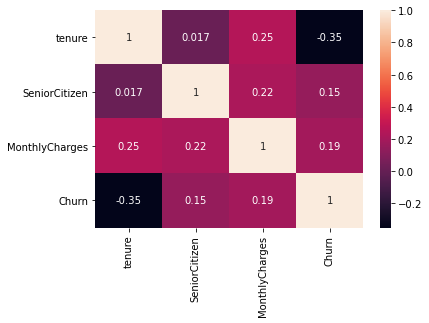

In [11]:
#matrix with Churn
correlations_matrix = churn_data.corr()               
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [12]:
#X/y split
X = churn_data.drop('Churn',axis = 1)
y = churn_data['Churn']

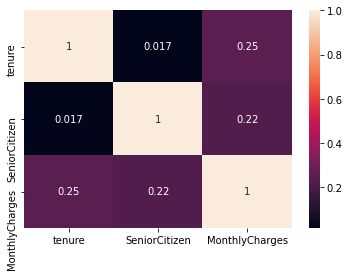

In [13]:
#matrix without Churn
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
# start scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 


In [15]:
# split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [16]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [18]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

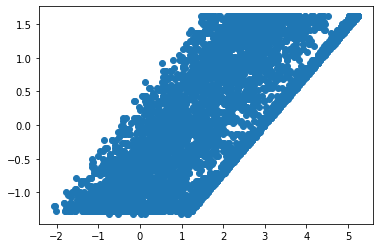

In [19]:
plt.scatter(logits,X_train_scaled['tenure'])

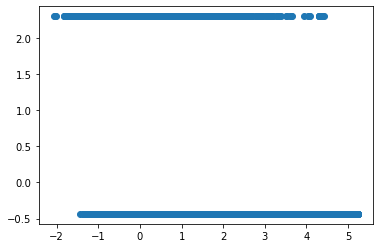

In [20]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

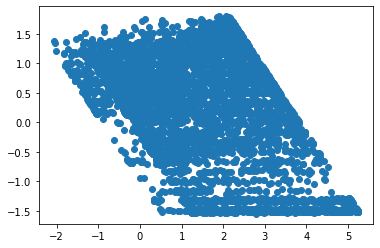

In [21]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

<AxesSubplot:>

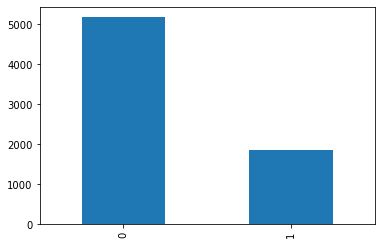

In [22]:
# interesting imbalance
count_classes = churn_data['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [23]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [24]:
# accuracy is not that bad...
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

In [26]:
from imblearn.over_sampling import SMOTE

In [43]:
# Just a bit of magic
# tried 1,2,3,4,5 and 3 seems to be the best
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [44]:
X_train_SMOTE.shape

(7752, 3)

In [45]:
# "small improvements", improved RECALL (identify the ppl who will churn), and f1 increased = better model
# prescision = higher num of ppl who will churn but they will not (false-positives)
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [46]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)